In [2]:
#logspace
#x1, x2, n : 10^x1 과 10^x2사이에 등간격인 n개의 벡터를 생성
import numpy as np
np.logspace(1, 2, 9)    #10부터 100까지 9개의 등간격을 가진 수

array([ 10.        ,  13.33521432,  17.7827941 ,  23.71373706,
        31.6227766 ,  42.16965034,  56.23413252,  74.98942093,
       100.        ])

In [3]:
#어제 마지막으로 푼 문제 모범답안
#최소제곱법의 a와 b를 구하라
#a = ((x-x의 평균)*(y-y의평균)의합) / (x-x평균)^2
#b = y의 평균 - (x의 평균 * a)

#numpy에서 mean은 평균값을 의미한다
import numpy as np

#x값과 y값
x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

#x와 y의 평균값
mx = np.mean(x)
my = np.mean(y)
print("x의 평균값 :", mx)
print("y의 평균값 :", my)

#기울기 공식의 분모
#(x-x평균)의 제곱의 합
divisor = sum([(mx-i)**2 for i in x])

#기울기 공식의 분자
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
#dividend = top(x, mx, y, my)
dividend = sum([(x[i] - mx)*(y[i] - my) for i in range(len(x))]) #위의것과 동일한 결과가 나온다.
                                                 #x와 y는 길이가 같으니까 len(x)로 해도 위와 같은 식이 나온다.

print("분모 :", divisor)
print("분자 :", dividend)

#기울기와 y절편 구하기
a = dividend / divisor
b = my - (mx*a)

#출력으로 확인
print("기울기 a =", a)
print("y 절편 b =",b)

x의 평균값 : 5.0
y의 평균값 : 90.5
분모 : 20.0
분자 : 46.0
기울기 a = 2.3
y 절편 b = 79.0


In [5]:
#최소제곱 - 사육기간에 따른 물고기 크기
#1) 15, 22, 77, 200주 후의 크기 예상
x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [0.2, 0.3, 0.5, 0.6, 0.9, 0.95, 1.1, 1.5]
mx = np.mean(x)
my = np.mean(y)
sun = sum([(x[i]-mx)*(y[i]-my) for i in range(len(x))])
mom = sum([(mx-i)**2 for i in x])
a = sun/mom
b = my - (mx*a)

X = [15, 22, 77, 200]
Y = [(a * i + b) for i in X]

for i in range(len(X)):
  if Y[i] > 30:
    Y[i] = 30.0
  print(X[i], "주차 : %.3f cm"%Y[i])
print()

#2) 5주차 예상 크기와 실제 크기 차이
fiveY = y[4] - (a*5 + b)
print("5주차 예상 크기와 실제 크기 차이 : %.3f cm"%fiveY)

#3) 모든 소수점 이하 자리수는 3자리 round(실수, n)

15 주차 : 2.600 cm
22 주차 : 3.829 cm
77 주차 : 13.487 cm
200 주차 : 30.000 cm

5주차 예상 크기와 실제 크기 차이 : 0.056 cm


In [6]:
#모범답안
maxSize = 30
xData = [1, 2, 3, 4, 5, 6, 7, 8]
yData = [0.2, 0.3, 0.5, 0.6, 0.9, 0.95, 1.1, 1.5]
xAvg = np.mean(xData)
yAvg = np.mean(yData)
print("x평균 :", xAvg)
print("y평균 :", yAvg)

#분모
divisor = sum([(i - xAvg) ** 2 for i in xData])

#분자
dividend = 0
for i in range(len(xData)):
    dividend += (xData[i] - xAvg) * (yData[i] - yAvg)

#기울기
a = dividend / divisor

#y절편
b = yAvg - (xAvg * a)

print("분모 :",divisor)
print("분자 :",dividend)
print("기울기 :", a)
print("y절편 :", b)

def sizeof(x):    #물고기 사이즈는 최대 30cm 로 가정
    global maxSize
    v = a*x + b
    #return maxSize if v > maxSize else round(v, 3)    #maxSize(30)가 v(예상크기)보다 작으면 maxSize 출력, 아니면 v출력(실수3자리로)
    #위 식은 다음과 같다
    if v < maxSize:
        v = round(v, 3)
    else:
        v = maxSize
    return v


print("15주 후의 크기 :", sizeof(15), "cm")
print("22주 후의 크기 :", sizeof(22), "cm")
print("77주 후의 크기 :", sizeof(77), "cm")
print("200주 후의 크기 :", sizeof(200), "cm")
print("5주차 예상치와 차이 : ",round(0.9 - sizeof(5), 3), "cm")

x평균 : 4.5
y평균 : 0.7562500000000001
분모 : 42.0
분자 : 7.375
기울기 : 0.17559523809523808
y절편 : -0.03392857142857131
15주 후의 크기 : 2.6 cm
22주 후의 크기 : 3.829 cm
77주 후의 크기 : 13.487 cm
200주 후의 크기 : 30 cm
5주차 예상치와 차이 :  0.056 cm


In [7]:
#루트를 구하는 함수 : np.sqrt()
#평균 제곱근 공식 : np.sqrt( ( (p-a)**2.mean() )
#실제값과 예측값의 차 구하는 평균 제곱근 오차
#a는 3, b는 76
x = [2, 4, 6, 8]
real = [81, 93, 91, 97]
rmse = 0

for i in range(len(x)):
  Y = 3*x[i] + 76
  n = real[i] - Y
  rmse += n**2

print("rmse 최종값 : ", np.sqrt(rmse/len(x)))

rmse 최종값 :  3.3166247903554


In [8]:
#모범답안
#기울기 a와 y절편 b
ab = [3, 76]

#x, y의 데이터 값
data = [[2,81], [4,93], [6,91], [8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# y = ax + b에 a와 b값을 대입하여 결과를 출력하는 함수
def predict(x):
    return ab[0] * x + ab[1]

#RMSE 함수
def rmse(p, a):
    return np.sqrt( ( (p-a)**2 ).mean() )

#RMSE 함수를 각 y값에 대입하여 최종 값을 구하는 함수
def rmse_val(predict_result, y):
    return rmse(np.array(predict_result), np.array(y))

#예측 값이 들어갈 빈 리스트
predict_result = []

#모든 x값을 한 번씩 대입하여
for i in range(len(x)):
    #predict_result 리스트를 완성한다
    predict_result.append(predict(x[i]))
    print("공부한 시간 = %.f, 실제 점수 = %.f, 예측 점수 = %.f" %(x[i], y[i], predict(x[i])))

#for문을 통해 만들어진 예측값과 실제값 확인해보기
print(predict_result)
print(y)

#최종 RMSE출력
print("rmse 최종값 :" + str(rmse_val(predict_result,y)))

공부한 시간 = 2, 실제 점수 = 81, 예측 점수 = 82
공부한 시간 = 4, 실제 점수 = 93, 예측 점수 = 88
공부한 시간 = 6, 실제 점수 = 91, 예측 점수 = 94
공부한 시간 = 8, 실제 점수 = 97, 예측 점수 = 100
[82, 88, 94, 100]
[81, 93, 91, 97]
rmse 최종값 :3.3166247903554


In [9]:
#물고기 사육주수 data를 통해 실제 예측값의 평균 제곱근 오차 구하기
data = [[1,0.2], [2,0.3], [3,0.5], [4,0.6], [5,0.9], [6,0.95], [7,1.1], [8,1.5]]
x = [i[0] for i in data]
y = [i[1] for i in data]
ab = [0.1756, -0.03392]
result = []

def rmse(p, a):
  return np.sqrt( ( (p-a)**2).mean() )

for i in range(len(x)):
  result.append(ab[0]*x[i] + ab[1])

ans = rmse(np.array(result), np.array(y))
print(ans)

#다른 풀이
#append는 용량이 많이 드니까 미리 리스트를 0으로 작성하고 만들어봤다
data = [[1,0.2], [2,0.3], [3,0.5], [4,0.6], [5,0.9], [6,0.95], [7,1.1], [8,1.5]]
x = [i[0] for i in data]
y = [i[1] for i in data]
ab = [0.1756, -0.03392]
result = np.zeros(len(data))

def rmse(p, a):
  return np.sqrt( ( (p-a)**2).mean() )

for i in range(len(x)):
  result[i] = ab[0]*x[i] + ab[1]

ans = rmse(np.array(result), np.array(y))
print(ans)

0.07260563614486139
0.07260563614486139


In [10]:
#모범답안
ab = [0.1756, -0.03392]
data = [[1,0.2], [2,0.3], [3,0.5], [4,0.6], [5,0.9], [6,0.95], [7,1.1], [8,1.5]]
x = [i[0] for i in data]
y = [i[1] for i in data]

#y = ax + b에 a와 b 값을 대입하여 결과를 출력하는 ㅎ마수
def predict(x):
    return ab[0] * x + ab[1]

#RMSE함수
def rmse(p, a):
    return np.sqrt( ( (p-a)**2 ).mean() )

#RMSE함수를 각 y값에 대입하여 최종 값을 구하는 ㅎ마수
def rmse_val(predict_result, y):
    return rmse(np.array(predict_result), np.array(y))

#예측 값이 들어간 빈 리스트
predict_result = []

#모든 x값을 한번씩 대입하여
for i in range(len(x)):
    #predict_result 리스트를 완성한다
    predict_result.append(predict(x[i]))
    print("주수 = %.f, 실제 크기 = %.2f, 예측 크기 = %.2f" %(x[i], y[i], predict(x[i])))

#for문을 통해 만들어진 예측값과 실제값 확인해보기
print(predict_result)
print(y)

#최종 RMSE 출력
print("rmse 최종값 : " + str(rmse_val(predict_result,y)))

주수 = 1, 실제 크기 = 0.20, 예측 크기 = 0.14
주수 = 2, 실제 크기 = 0.30, 예측 크기 = 0.32
주수 = 3, 실제 크기 = 0.50, 예측 크기 = 0.49
주수 = 4, 실제 크기 = 0.60, 예측 크기 = 0.67
주수 = 5, 실제 크기 = 0.90, 예측 크기 = 0.84
주수 = 6, 실제 크기 = 0.95, 예측 크기 = 1.02
주수 = 7, 실제 크기 = 1.10, 예측 크기 = 1.20
주수 = 8, 실제 크기 = 1.50, 예측 크기 = 1.37
[0.14168, 0.31728, 0.49288000000000004, 0.6684800000000001, 0.84408, 1.0196800000000001, 1.1952800000000001, 1.37088]
[0.2, 0.3, 0.5, 0.6, 0.9, 0.95, 1.1, 1.5]
rmse 최종값 : 0.07260563614486139


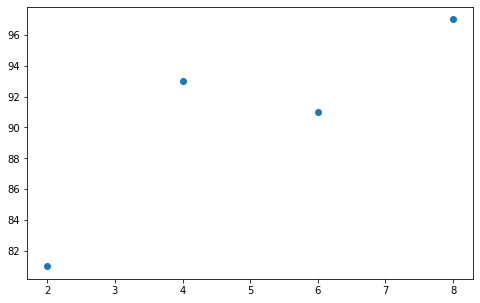

epoch = 0, 기울기 = 9.2800, 절편 = 1.8100
epoch = 100, 기울기 = 11.5301, 절편 = 23.9186
epoch = 200, 기울기 = 8.9703, 절편 = 39.1944
epoch = 300, 기울기 = 7.1204, 절편 = 50.2337
epoch = 400, 기울기 = 5.7836, 절편 = 58.2115
epoch = 500, 기울기 = 4.8175, 절편 = 63.9768
epoch = 600, 기울기 = 4.1193, 절편 = 68.1432
epoch = 700, 기울기 = 3.6148, 절편 = 71.1541
epoch = 800, 기울기 = 3.2501, 절편 = 73.3300
epoch = 900, 기울기 = 2.9866, 절편 = 74.9025
epoch = 1000, 기울기 = 2.7962, 절편 = 76.0388
epoch = 1100, 기울기 = 2.6586, 절편 = 76.8601
epoch = 1200, 기울기 = 2.5591, 절편 = 77.4535
epoch = 1300, 기울기 = 2.4873, 절편 = 77.8824
epoch = 1400, 기울기 = 2.4353, 절편 = 78.1924
epoch = 1500, 기울기 = 2.3978, 절편 = 78.4163
epoch = 1600, 기울기 = 2.3707, 절편 = 78.5782
epoch = 1700, 기울기 = 2.3511, 절편 = 78.6952
epoch = 1800, 기울기 = 2.3369, 절편 = 78.7797
epoch = 1900, 기울기 = 2.3267, 절편 = 78.8408
epoch = 2000, 기울기 = 2.3193, 절편 = 78.8850


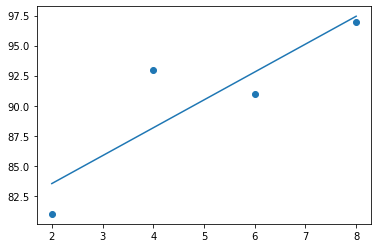

In [12]:
#경사하강법 실습
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#공부시간 x와 성적 y의 리스트 만들기
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

#그래프로 나타내기
plt.figure(figsize = (8, 5))    #그림 그리는 영역 만들기
plt.scatter(x, y)
plt.show()    #차트를 실제 화면에 표시

#리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸기
#인덱스를 주어 하나씩 불러와 계산이 가능하게 하기 위함
x_data = np.array(x)
y_data = np.array(y)

#기울기 a와 절편 b의 값 초기화
a = 0
b = 0

#학습륙 정하기
lr = 0.01

#몇번 반복될지 설정(0부터 세므로 원하는 반복수 + 1)
epochs = 2001

#경사 하강법 시작
for i in range(epochs):    #에포크 수만큼 반복
  y_pred = a * x_data + b    #y를 구하는 식 세우기
  error = y_data - y_pred    #오차를 구하는 식

  #오차 함수를 a로 미분한 값(오차를 구하는 식, 오차가 0이 될때까지 조정)
  a_diff = 2/len(x_data) * sum((a * x_data + b - y_data) * x_data)

  #오차 함수를 b로 미분한 값
  b_diff = 2/len(x_data) * sum(a * x_data + b - y_data)

  a = a - lr * a_diff    #학습률을 곱해 기존의 a값 업데이트
  b = b - lr * b_diff    #학습률을 곱해 기존의 b값 업데이트

  if i%100 == 0:    #100번 반복될 때마다 현재의 a값, b값 출력
    print("epoch = %.f, 기울기 = %.04f, 절편 = %.04f" %(i,a,b))

#앞서 구한 기울기와 절편을 이용해 그래프 다시 그리기
y_pred = a * x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
          #plot() : 값을 서로 연결해서 라인 형태의 그래프를 그리는 함수
plt.show()